## 生成数据，包含X和y, training data and test data

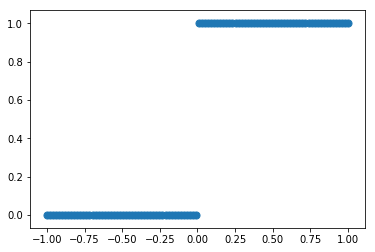

In [5]:
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
data_num = 100
# 构建样本
x = torch.unsqueeze(torch.linspace(-1,1,data_num), dim=1)
# 构建label
y0 = torch.zeros(50) 
y1 = torch.ones(50)
y = torch.cat((y0, y1)).type(torch.LongTensor)
plt.scatter(x.data, y.data, s=50, cmap='autumn')
plt.show()

###  定义分类精度评估函数

计算被正确分类的精度，显然精度越高越好


In [2]:
def get_acc(labels, outputs):
    '''get_acc: Get the classification accuracy
        Inputs: labels: the ground truth; 
                outputs: the predicted labels of a DNN 
        Outputs: the accuracy 
    '''
    _, predicted = torch.max(outputs.data, 1)
    data_num = y.shape[0]*1.0
    #item() to get a Python number from a tensor containing a single value:
    correct_num = (predicted == labels).sum().item()
    accuracy = correct_num/data_num
    return accuracy

## 定义一个分类的class
### 网络结构：包含一个隐藏层

In [3]:
class SimpleNet(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(SimpleNet, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        hidden_result = self.hidden(x)
        x = F.relu(hidden_result)
        x = self.predict(x)
        return x


## 训练一个分类器，二类分类器


In [4]:

mynet = SimpleNet(1,10,2)
print(mynet.parameters)

optimizer = torch.optim.SGD(mynet.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(1000):
    optimizer.zero_grad()
    # forward + backward + optimize
    out = mynet(x)
    loss = loss_func(out, y)
    loss.backward()
    optimizer.step()

    if t % 10 == 0:
        acc = get_acc(y, out)
        print('acc is:', acc)

<bound method Module.parameters of SimpleNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)>
acc is: 0.5
acc is: 0.5
acc is: 0.5
acc is: 0.5
acc is: 0.5
acc is: 0.5
acc is: 0.5
acc is: 0.74
acc is: 0.91
acc is: 0.97
acc is: 1.0
acc is: 0.99
acc is: 0.98
acc is: 0.98
acc is: 0.98
acc is: 0.98
acc is: 0.98
acc is: 0.98
acc is: 0.98
acc is: 0.99
acc is: 0.99
acc is: 0.99
acc is: 0.99
acc is: 0.99
acc is: 0.99
acc is: 0.99
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc is: 1.0
acc 